# Random forest classifier - Basics

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/trees/random_forest_classifier_basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic data set

To illustrate the concepts we will use a synthetic data set which we generate using the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function

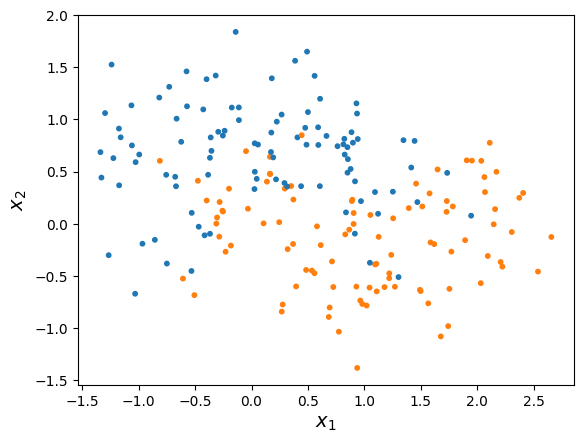

In [2]:
X, y = make_moons(200, noise=0.4, random_state=1)

colors = np.array(['tab:blue', 'tab:orange'])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.show()

## Decision tree classifier

The problem with decision trees, is that they tend to over fit. In the case of our example, using a decision tree will (unless we did tune the hyper-parameters) over fit.

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [4]:
def plot_dec_bound(clf, X, y, ax):
    '''
    Plot decision boundaries
    '''
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z-100, cmap=plt.cm.Greens)

    colors = np.array(['tab:blue', 'tab:orange'])
    ax.scatter(X[:, 0], X[:, 1], s=12, color=colors[y])
    
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)

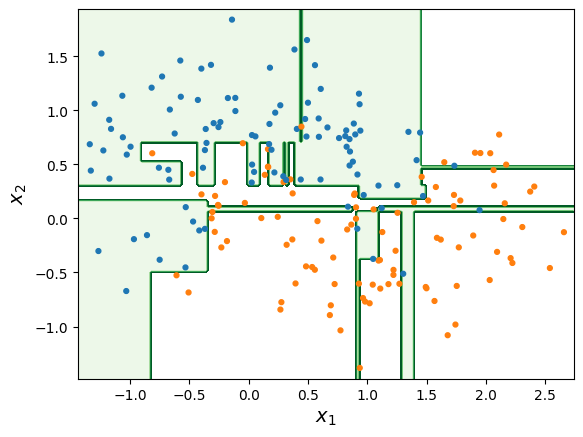

In [5]:
fig, ax = plt.subplots(1, 1)
plot_dec_bound(clf, X, y, ax)
plt.show()

## Random forest classifier

An answer to the problematic of over fitting of decision trees are random forests. Random forests combine several decision trees. They do this by training several decision trees on set drawn (without replacement) from the data set. The classification is then done by voting (e.g. if 30 trees say class 1 and 40 say class 2, then the random forest classifier assigns class 2).

This method is efficient if each decision tree is very different from each other. This is obtained on one side by drawing random sub-sets from the original data set but further randomness is introduced by the way each individual decision tree decides the splitting boundaries. Instead of looking for the variable which gives the highest reduction in the classification metrics (e.g. Gini impurity), it draws a random sub-set of variables over which the Decision tree will look for the variable leading to the largest reduction the classification metrics.

Random forests are implemented in Scikit Learn with the class [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [6]:
clf = RandomForestClassifier(n_estimators=20, random_state=1)
clf.fit(X, y)

RandomForestClassifier(n_estimators=20, random_state=1)

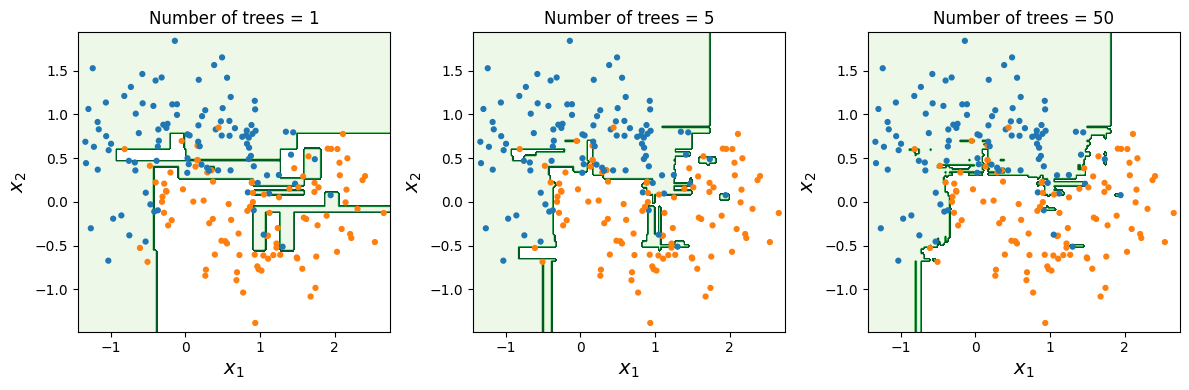

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
i = 0

for n in [1, 5, 50]:
    clf = RandomForestClassifier(n_estimators=n, random_state=1)
    clf.fit(X, y)
    plot_dec_bound(clf, X, y, ax[i])
    ax[i].set_title('Number of trees = ' + str(n))
    i = i+1
    
plt.tight_layout()
plt.show()

## Hyper-parameter N (number of trees)

Depending on the value of the hyper-parameter N (number of trees used to grow the forest), the classification can be over-fitted or not.

Cross validation can be used for tuning the hyper-parameter N (number of trees).

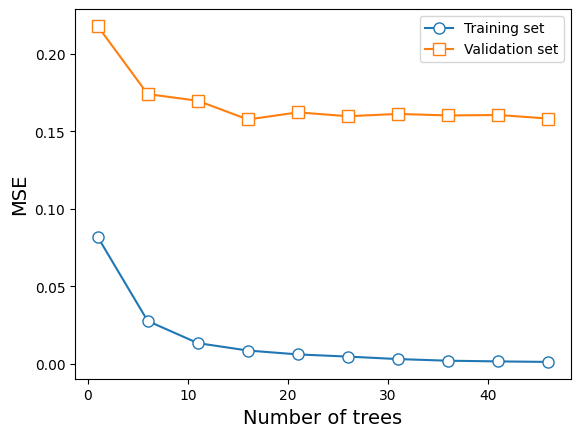

In [8]:
MSE_train = []
MSE_valid = []

n_max = 50
n_range = range(1, n_max, 5)
for n in n_range:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X, y)
    scores = cross_validate(clf, X, y,
                            cv=RepeatedKFold(n_splits=10, n_repeats=50),
                            scoring='neg_mean_squared_error', return_train_score=True)
    MSE_train = np.append(MSE_train, -scores['train_score'].mean())
    MSE_valid = np.append(MSE_valid, -scores['test_score'].mean())

plt.plot(n_range, MSE_train, "o-", markersize=8, markerfacecolor='white', label='Training set')
plt.plot(n_range, MSE_valid, "s-", markersize=8, markerfacecolor='white', label='Validation set')
plt.xlabel('Number of trees', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.legend(loc='best')
plt.show()

In [9]:
n_opt = n_range[np.argmin(MSE_valid)]

clf = RandomForestClassifier(n_estimators=n_opt)
clf.fit(X, y)

RandomForestClassifier(n_estimators=16)

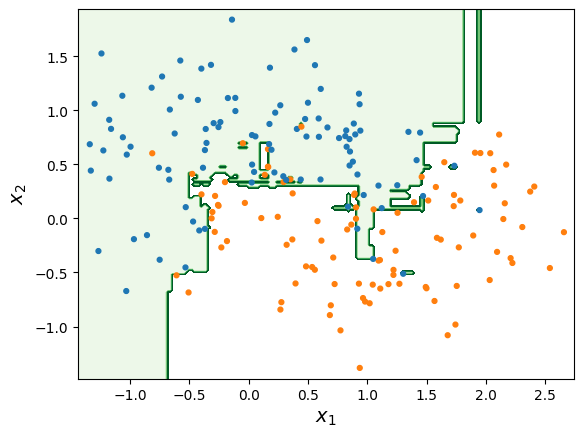

In [10]:
fig, ax = plt.subplots(1, 1)
plot_dec_bound(clf, X, y, ax)
plt.show()

## Suggested activities

* Repeat the examples by increasing the `noise` when generating the data set. What do you observe? Can you explain it? 
* Repeat the examples by changing the type of data set. You can find some synthetic sets [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) under Samples generator.
